In [1]:
from parfamwrapper import ParFamWrapper

import sympy
import torch
import numpy as np
import matplotlib.pyplot as plt

/home/math/scholl/projects/physicalLawLearning/parfam
Using cpu.


In [2]:
# Collection of function for ParFam to use, can be readily extended

function_dict = {'sqrt': lambda x: torch.sqrt(torch.abs(x)),
                 'exp': lambda x: torch.minimum(torch.exp(x), np.exp(10) + torch.abs(x)),
                 'log': lambda x: torch.log(torch.abs(x) + 0.000001),
                 'cos': torch.cos, 'sin': torch.sin}
function_name_dict = {'sqrt': lambda x: sympy.sqrt(sympy.Abs(x)), 'exp': sympy.exp, 'cos': sympy.cos, 'sin': sympy.sin,
                      'log': lambda x: sympy.log(sympy.Abs(x) + 0.000001)}

standard_function_names_str = ['sin', 'sqrt', 'exp', 'sqrt'] 
standard_functions = [function_dict[key] for key in standard_function_names_str]
standard_function_names = [function_name_dict[key] for key in standard_function_names_str]

# Basic functionality

## One dimensional problem

In [3]:
device = 'cpu'

a = 2 * torch.randn(1)

x = np.arange(1, 5, 0.2)  # 1 dimensional 
x = x.reshape(len(x), 1)  # 1 dimensional 
print(x.shape) 
x = torch.tensor(x, device=device)

def func(a, x, module):
    # return module.sin((a[0] * x + 1) / (0.1 * x + 2))
    # return module.sin((a[0] * x + 1) / (0.1 * x)) 
    # return module.sin((a[0] * x)) 
    # return a[0] * x / (1+x)
    return 0.2 * module.sin(a[0] * x) / x
    # return 0.5 * x / (x + 1)
    # return module.log(x + 1.4) + module.log(x ** 2 + 1.3)
    # return module.sin(x ** 2) * module.cos(x) - 1

y = func(a, x, np).squeeze(1)
x_sym = sympy.symbols('x')

target_expr = func(a, x_sym, sympy)
print(f'Target formula: {target_expr}')

(20, 1)
Target formula: -0.2*sin(1.15494120121002*x)/x


In [4]:
# Assuming we already know that only the sin function is necessary:
functions = [torch.sin]
function_names = [sympy.sin]

In [5]:
# The config picks defines all the model and training parameter choices. See config_files/wrapper. 'small' is the default. For bigger experiments, for example those in SRBench, choose 'big'.
# Every additional variable overwrites the settings in the config. E.g., we restrict the functions we use to being simply the sin function.
parfam = ParFamWrapper(config_name='small', iterate=True, functions=functions, function_names=function_names)
parfam.fit(x, y, time_limit=100)  # time_limit is in seconds, might have to be higher for higher dimensions and more complicated parametric families

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1632: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 3
INFO:root:Number parameters active: 3


Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 20, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 3
Number parameters active: 3


INFO:root:Number of evaluations: 289
INFO:root:Relative l2 distance train: 0.07445628079529869
INFO:root:Relative l2 distance validation: 0.21059638530122587
INFO:root:Training time: 0.8051085472106934
INFO:root:Cumulative training time: 0.812990665435791
INFO:root:Cumulative number of evaluations: 289
INFO:root:New best relative l2 distance validation: 0.21059638530122587
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 4
INFO:root:Number parameters active: 4


Training time: 0.8051085472106934
Target expression: None
Relative l_2-distance train: 0.07445628079529869
Relative l_2-distance validation: 0.21059638530122587
##### Training #####
Number parameters: 4
Number parameters active: 4


INFO:root:Number of evaluations: 2934
INFO:root:Relative l2 distance train: 0.1758308050508022
INFO:root:Relative l2 distance validation: 0.5539497009323481
INFO:root:Training time: 0.946796178817749
INFO:root:Cumulative training time: 1.7609152793884277
INFO:root:Cumulative number of evaluations: 3223
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 5
INFO:root:Number parameters active: 5


Training time: 0.946796178817749
Target expression: None
Relative l_2-distance train: 0.1758308050508022
Relative l_2-distance validation: 0.5539497009323481
##### Training #####
Number parameters: 5
Number parameters active: 5


INFO:root:Number of evaluations: 2851
INFO:root:Relative l2 distance train: 0.03940303876067012
INFO:root:Relative l2 distance validation: 0.1792029425611781
INFO:root:Training time: 0.9296715259552002
INFO:root:Cumulative training time: 2.691781520843506
INFO:root:Cumulative number of evaluations: 6074
INFO:root:New best relative l2 distance validation: 0.1792029425611781
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 5
INFO:root:Number parameters active: 5


Training time: 0.9296715259552002
Target expression: None
Relative l_2-distance train: 0.03940303876067012
Relative l_2-distance validation: 0.1792029425611781
##### Training #####
Number parameters: 5
Number parameters active: 5


INFO:root:Number of evaluations: 1443
INFO:root:Relative l2 distance train: 0.023129640668343235
INFO:root:Relative l2 distance validation: 0.1151416085531793
INFO:root:Training time: 0.9138591289520264
INFO:root:Cumulative training time: 3.6071650981903076
INFO:root:Cumulative number of evaluations: 7517
INFO:root:New best relative l2 distance validation: 0.1151416085531793
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6


Training time: 0.9138591289520264
Target expression: None
Relative l_2-distance train: 0.023129640668343235
Relative l_2-distance validation: 0.1151416085531793
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 1462
INFO:root:Relative l2 distance train: 0.000671510526053095
INFO:root:Relative l2 distance validation: 0.00410675272436794
INFO:root:Training time: 0.5809619426727295
INFO:root:Cumulative training time: 4.189242124557495
INFO:root:Cumulative number of evaluations: 8979
INFO:root:New best relative l2 distance validation: 0.00410675272436794
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 7
INFO:root:Number parameters active: 7


Training time: 0.5809619426727295
Target expression: None
Relative l_2-distance train: 0.000671510526053095
Relative l_2-distance validation: 0.00410675272436794
##### Training #####
Number parameters: 7
Number parameters active: 7


INFO:root:Number of evaluations: 2135
INFO:root:Relative l2 distance train: 0.010434115620719685
INFO:root:Relative l2 distance validation: 0.030518638050996947
INFO:root:Training time: 1.0108497142791748
INFO:root:Cumulative training time: 5.201282739639282
INFO:root:Cumulative number of evaluations: 11114
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 8
INFO:root:Number parameters active: 8


Training time: 1.0108497142791748
Target expression: None
Relative l_2-distance train: 0.010434115620719685
Relative l_2-distance validation: 0.030518638050996947
##### Training #####
Number parameters: 8
Number parameters active: 8


INFO:root:Number of evaluations: 1828
INFO:root:Relative l2 distance train: 0.00022758437554445412
INFO:root:Relative l2 distance validation: 0.0033992486077562846
INFO:root:Training time: 0.8811366558074951
INFO:root:Cumulative training time: 6.08389687538147
INFO:root:Cumulative number of evaluations: 12942
INFO:root:New best relative l2 distance validation: 0.0033992486077562846
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 7
INFO:root:Number parameters active: 7


Training time: 0.8811366558074951
Target expression: None
Relative l_2-distance train: 0.00022758437554445412
Relative l_2-distance validation: 0.0033992486077562846
##### Training #####
Number parameters: 7
Number parameters active: 7


INFO:root:Number of evaluations: 1496
INFO:root:Relative l2 distance train: 0.02725756604307378
INFO:root:Relative l2 distance validation: 0.1397665603933638
INFO:root:Training time: 0.7169973850250244
INFO:root:Cumulative training time: 6.802123069763184
INFO:root:Cumulative number of evaluations: 14438
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 8
INFO:root:Number parameters active: 8


Training time: 0.7169973850250244
Target expression: None
Relative l_2-distance train: 0.02725756604307378
Relative l_2-distance validation: 0.1397665603933638
##### Training #####
Number parameters: 8
Number parameters active: 8


INFO:root:Number of evaluations: 1358
INFO:root:Relative l2 distance train: 0.00692951255691158
INFO:root:Relative l2 distance validation: 0.13332954008537454
INFO:root:Training time: 0.6422224044799805
INFO:root:Cumulative training time: 7.4455718994140625
INFO:root:Cumulative number of evaluations: 15796
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 9
INFO:root:Number parameters active: 9


Training time: 0.6422224044799805
Target expression: None
Relative l_2-distance train: 0.00692951255691158
Relative l_2-distance validation: 0.13332954008537454
##### Training #####
Number parameters: 9
Number parameters active: 9


INFO:root:Number of evaluations: 1632
INFO:root:Relative l2 distance train: 0.007310927017525457
INFO:root:Relative l2 distance validation: 0.292805252480073
INFO:root:Training time: 0.9170286655426025
INFO:root:Cumulative training time: 8.36379599571228
INFO:root:Cumulative number of evaluations: 17428
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 0.9170286655426025
Target expression: None
Relative l_2-distance train: 0.007310927017525457
Relative l_2-distance validation: 0.292805252480073
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1759
INFO:root:Relative l2 distance train: 0.009860342296144613
INFO:root:Relative l2 distance validation: 0.34835597167728216
INFO:root:Training time: 0.9839749336242676
INFO:root:Cumulative training time: 9.3490469455719
INFO:root:Cumulative number of evaluations: 19187
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 1, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 8
INFO:root:Number parameters active: 8


Training time: 0.9839749336242676
Target expression: None
Relative l_2-distance train: 0.009860342296144613
Relative l_2-distance validation: 0.34835597167728216
##### Training #####
Number parameters: 8
Number parameters active: 8


INFO:root:Number of evaluations: 1545
INFO:root:Relative l2 distance train: 0.0001616620865956463
INFO:root:Relative l2 distance validation: 0.0007771674057123306
INFO:root:Training time: 0.8482217788696289
INFO:root:Cumulative training time: 10.198663473129272
INFO:root:Cumulative number of evaluations: 20732
INFO:root:New best relative l2 distance validation: 0.0007771674057123306
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 7 / 10 was reached
INFO:root:Time for multiprocessing in total: 10.214088439941406


Training time: 0.8482217788696289
Target expression: None
Relative l_2-distance train: 0.0001616620865956463
Relative l_2-distance validation: 0.0007771674057123306
Terminate proccess, wanted accuracy 0.001 and number of active parameters 7 / 10 was reached


INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Best distance (train, val, test): (tensor(0.0002, dtype=torch.float64), tensor(0.0008, dtype=torch.float64), tensor(0.0002, dtype=torch.float64))
INFO:root:Best formula: (-0.007*x0 + 0.17*sin(1.185*x0 + 2.965) + 0.036)/(0.952*x0 + 0.02*sin(1.185*x0 + 2.965) - 0.306) best training time: 0.8482217788696289


In [6]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')

Target formula: -0.2*sin(1.15494120121002*x)/x
Computed formula: (-0.007*x0 + 0.17*sin(1.185*x0 + 2.965) + 0.036)/(0.952*x0 + 0.02*sin(1.185*x0 + 2.965) - 0.306)


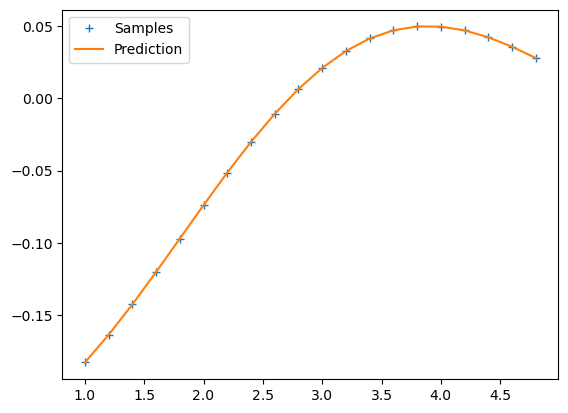

Relative l2 distance: 0.00022161944890740083


In [7]:
y_pred = parfam.predict(x).cpu().detach().numpy()
plt.plot(x, y, '+', label='Samples')
plt.plot(x, y_pred, label='Prediction')
plt.legend()
plt.show()

print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')


## 2 dimensional problem

In [8]:
a = 2 * torch.randn(1)
x = np.sort(np.random.uniform(-1.2, 5, 100))
x = np.random.uniform(-3, 3, 200).reshape(100, 2)
print(x.shape)
x = torch.tensor(x, device=device)

def func(a, x, module):
    return module.sin(x[0]) * x[1]


y = func(a, x.T, np)
x_sym = []
for i in range(x.shape[1]):
    x_sym.append(sympy.symbols(f'x{i}'))
target_expr = func(a, x_sym, sympy)
print(f'Target formula: {target_expr}')

(100, 2)
Target formula: x1*sin(x0)


In [9]:
# Assuming we already know that only the sin function is necessary:
functions = [torch.sin]
function_names = [sympy.sin]

In [10]:
parfam = ParFamWrapper(iterate=True, functions=functions, function_names=function_names, degree_input_denominator=0, degree_output_denominator=0)
parfam.fit(x, y, time_limit=100)

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1632: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6
INFO:root:Number of evaluations: 208
INFO:root:Relative l2 distance train: 0.48243015419397106
INFO:root:Relative l2 distance validation: 0.43107807011684174
IN

Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 100, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 6
Number parameters active: 6
Training time: 0.06168937

INFO:root:Number of evaluations: 322
INFO:root:Relative l2 distance train: 0.9130825548294452
INFO:root:Relative l2 distance validation: 0.9365055738262088
INFO:root:Training time: 0.13737797737121582
INFO:root:Cumulative training time: 0.20189285278320312
INFO:root:Cumulative number of evaluations: 530
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 0.13737797737121582
Target expression: None
Relative l_2-distance train: 0.9130825548294452
Relative l_2-distance validation: 0.9365055738262088
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 631
INFO:root:Relative l2 distance train: 0.2783534748587178
INFO:root:Relative l2 distance validation: 0.3433567922693776
INFO:root:Training time: 0.26761341094970703
INFO:root:Cumulative training time: 0.47103118896484375
INFO:root:Cumulative number of evaluations: 1161
INFO:root:New best relative l2 distance validation: 0.3433567922693776
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 12
INFO:root:Number parameters active: 12


Training time: 0.26761341094970703
Target expression: None
Relative l_2-distance train: 0.2783534748587178
Relative l_2-distance validation: 0.3433567922693776
##### Training #####
Number parameters: 12
Number parameters active: 12


INFO:root:Number of evaluations: 1108
INFO:root:Relative l2 distance train: 0.23916209214289127
INFO:root:Relative l2 distance validation: 0.24955457001762366
INFO:root:Training time: 0.6094515323638916
INFO:root:Cumulative training time: 1.0819621086120605
INFO:root:Cumulative number of evaluations: 2269
INFO:root:New best relative l2 distance validation: 0.24955457001762366
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 15
INFO:root:Number parameters active: 15


Training time: 0.6094515323638916
Target expression: None
Relative l_2-distance train: 0.23916209214289127
Relative l_2-distance validation: 0.24955457001762366
##### Training #####
Number parameters: 15
Number parameters active: 15


INFO:root:Number of evaluations: 1059
INFO:root:Relative l2 distance train: 0.15171978803774053
INFO:root:Relative l2 distance validation: 0.3209283770934381
INFO:root:Training time: 0.6097464561462402
INFO:root:Cumulative training time: 1.6935420036315918
INFO:root:Cumulative number of evaluations: 3328
INFO:root:Time for multiprocessing in total: 1.7030441761016846


Training time: 0.6097464561462402
Target expression: None
Relative l_2-distance train: 0.15171978803774053
Relative l_2-distance validation: 0.3209283770934381


INFO:root:Best distance (train, val, test): (tensor(0.2392, dtype=torch.float64), tensor(0.2496, dtype=torch.float64), tensor(0.2601, dtype=torch.float64))
INFO:root:Best formula: -0.283*x0**2 + 0.474*x0*x1 + 1.02*x0*sin(0.747*x0 + 0.555*x1 + 0.129) - 0.016*x0 + 0.219*x1**2 - 0.425*x1*sin(0.747*x0 + 0.555*x1 + 0.129) + 0.073*x1 - 0.402 best training time: 0.6094515323638916


In [11]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')


Target formula: x1*sin(x0)
Computed formula: -0.283*x0**2 + 0.474*x0*x1 + 1.02*x0*sin(0.747*x0 + 0.555*x1 + 0.129) - 0.016*x0 + 0.219*x1**2 - 0.425*x1*sin(0.747*x0 + 0.555*x1 + 0.129) + 0.073*x1 - 0.402


In [12]:
y_pred = parfam.predict(x).cpu().detach().numpy()
print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')

Relative l2 distance: 0.24163395807860108


# More complicated functions

Test now the feynman formula III 10 19:
$$mom\sqrt{x^2+y^2+z^2}$$

In [13]:
n_datapoints = 500
dim = 4
x = np.random.uniform(1, dim, n_datapoints * dim).reshape(n_datapoints, dim)
print(x.shape)
x = torch.tensor(x, device=device)

def func(x, module):
    # return x[0] * (x[1]*(x[2]**2 + x[3]**2 + x[4]**2))**(1/2)
    return x[0] * ((x[2]**2 + x[3]**2 + x[1]**2))**(1/2)


y = func(x.T, np)
# x_sym = [sympy.symbols(symbol) for symbol in ['mom', 'B', 'x', 'y', 'z']]
x_sym = [sympy.symbols(symbol) for symbol in ['mom', 'x', 'y', 'z']]
# for i in range(x.shape[1]):
#     x_sym.append(sympy.symbols(f'x{i}'))
target_expr = func(x_sym, sympy)
print(f'Target formula: {target_expr}')

(500, 4)
Target formula: mom*(x**2 + y**2 + z**2)**0.5


In [14]:
# Assuming we already know that only the sqrt function is necessary.
# If we do not assume this knowledge, we could also just use the variable standard_functions and standard_function_names instead, it just takes more time.
# Do not define the sqrt here yourself by just defining it as torch.sqrt, since it is not defined on all reals, which is a problem for the optimizer. Thus, see how it was defined in the function_dict.  
functions = [function_dict['sqrt']]
function_names = [function_name_dict['sqrt']]

In [15]:
# ParFamWrapper with its most important input parameters
parfam = ParFamWrapper(iterate=True, # iterate through multiple different parametric families (costs more time, but is the better choice when one is not sure about the degrees and the functions of the target formula)
                       functions=functions, function_names=function_names, # which functions to use 
                       degree_input_numerator=2, degree_output_numerator=3, degree_input_denominator=0, degree_output_denominator=0,  # the maximal degrees of the polynomials in the parametric family
                       input_names=x_sym,  # the names of the input variables
                       enforce_function=False,  # has only an effect, if iterate=False
                       device='cpu', 
                       separate_test_set=True  # ParFam uses a smaller set for training, to use a part of it as a test set afterwards
                       )
parfam.fit(x, y, time_limit=100, seed=1234)  # If we cannot assume that degree_input_denominator=0 and degree_output_denominator=0 holds, we would have to increase the time limit

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1632: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 35
INFO:root:Number parameters active: 35


Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 500, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 35
Number parameters active: 35


INFO:root:Number of evaluations: 2110
INFO:root:Relative l2 distance train: 0.004852963370269322
INFO:root:Relative l2 distance validation: 0.006087892812096801
INFO:root:Training time: 0.9345018863677979
INFO:root:Cumulative training time: 0.937488317489624
INFO:root:Cumulative number of evaluations: 2110
INFO:root:New best relative l2 distance validation: 0.006087892812096801
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 0.9345018863677979
Target expression: None
Relative l_2-distance train: 0.004852963370269322
Relative l_2-distance validation: 0.006087892812096801
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1200
INFO:root:Relative l2 distance train: 0.13312445273737974
INFO:root:Relative l2 distance validation: 0.10351078922403623
INFO:root:Training time: 0.5637304782867432
INFO:root:Cumulative training time: 1.5028581619262695
INFO:root:Cumulative number of evaluations: 3310
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.5637304782867432
Target expression: None
Relative l_2-distance train: 0.13312445273737974
Relative l_2-distance validation: 0.10351078922403623
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2061
INFO:root:Relative l2 distance train: 0.09910290090575284
INFO:root:Relative l2 distance validation: 0.10834654290855726
INFO:root:Training time: 0.9985480308532715
INFO:root:Cumulative training time: 2.5034983158111572
INFO:root:Cumulative number of evaluations: 5371
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 0.9985480308532715
Target expression: None
Relative l_2-distance train: 0.09910290090575284
Relative l_2-distance validation: 0.10834654290855726
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1867
INFO:root:Relative l2 distance train: 0.021225963392843238
INFO:root:Relative l2 distance validation: 0.02267919090976496
INFO:root:Training time: 1.6284279823303223
INFO:root:Cumulative training time: 4.134258031845093
INFO:root:Cumulative number of evaluations: 7238
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 35
INFO:root:Number parameters active: 35


Training time: 1.6284279823303223
Target expression: None
Relative l_2-distance train: 0.021225963392843238
Relative l_2-distance validation: 0.02267919090976496
##### Training #####
Number parameters: 35
Number parameters active: 35


INFO:root:Number of evaluations: 3841
INFO:root:Relative l2 distance train: 1.2871244444645057e-07
INFO:root:Relative l2 distance validation: 1.4906590102158942e-07
INFO:root:Training time: 3.478419065475464
INFO:root:Cumulative training time: 7.6151463985443115
INFO:root:Cumulative number of evaluations: 11079
INFO:root:New best relative l2 distance validation: 1.4906590102158942e-07
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 4 / 10 was reached
INFO:root:Time for multiprocessing in total: 7.622427701950073
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not c

Training time: 3.478419065475464
Target expression: None
Relative l_2-distance train: 1.2871244444645057e-07
Relative l_2-distance validation: 1.4906590102158942e-07
Terminate proccess, wanted accuracy 0.001 and number of active parameters 4 / 10 was reached


In [16]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')

Target formula: mom*(x**2 + y**2 + z**2)**0.5
Computed formula: 1.00049737780766*x0*sqrt(Abs(x1**2 + x2**2 + x3**2))


In [17]:
y_pred = parfam.predict(x).cpu().detach().numpy()
print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')

Relative l2 distance: 3.650236287367951e-08


In [18]:
# If one has more time, one can also simply use the 'big' configuration (config_files/wrapper/big.ini) in the following way
parfam = ParFamWrapper(iterate=True, config_name='big')
parfam.fit(x, y, seed=1234, time_limit=500)

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1632: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 66
INFO:root:Number parameters active: 66


Training parameters: {'normalization': False, 'time_limit': 500, 'evaluations_limit': 1000000, 'max_dataset_length': 500, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0.0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 3, 'enforce_function_iterate': 'Both'}
Sequential computation
##### Training #####
Number parameters: 66
Number parameters active: 66


INFO:root:Number of evaluations: 3534
INFO:root:Relative l2 distance train: 0.002649219332609953
INFO:root:Relative l2 distance validation: 0.0029717487501623578
INFO:root:Training time: 2.2230474948883057
INFO:root:Cumulative training time: 2.2276833057403564
INFO:root:Cumulative number of evaluations: 3534
INFO:root:New best relative l2 distance validation: 0.0029717487501623578
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 2.2230474948883057
Target expression: None
Relative l_2-distance train: 0.002649219332609953
Relative l_2-distance validation: 0.0029717487501623578
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 4480
INFO:root:Relative l2 distance train: 0.13909446416690732
INFO:root:Relative l2 distance validation: 0.12273609961672621
INFO:root:Training time: 1.693350076675415
INFO:root:Cumulative training time: 3.922576665878296
INFO:root:Cumulative number of evaluations: 8014
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 20
INFO:root:Number parameters active: 20


Training time: 1.693350076675415
Target expression: None
Relative l_2-distance train: 0.13909446416690732
Relative l_2-distance validation: 0.12273609961672621
##### Training #####
Number parameters: 20
Number parameters active: 20


INFO:root:Number of evaluations: 2872
INFO:root:Relative l2 distance train: 0.022271135240979786
INFO:root:Relative l2 distance validation: 0.02310070459007912
INFO:root:Training time: 1.180112600326538
INFO:root:Cumulative training time: 5.104598045349121
INFO:root:Cumulative number of evaluations: 10886
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 40
INFO:root:Number parameters active: 40


Training time: 1.180112600326538
Target expression: None
Relative l_2-distance train: 0.022271135240979786
Relative l_2-distance validation: 0.02310070459007912
##### Training #####
Number parameters: 40
Number parameters active: 40


INFO:root:Number of evaluations: 3932
INFO:root:Relative l2 distance train: 0.00937179149041912
INFO:root:Relative l2 distance validation: 0.01089829477176194
INFO:root:Training time: 2.1326041221618652
INFO:root:Cumulative training time: 7.240247488021851
INFO:root:Cumulative number of evaluations: 14818
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 71
INFO:root:Number parameters active: 71


Training time: 2.1326041221618652
Target expression: None
Relative l_2-distance train: 0.00937179149041912
Relative l_2-distance validation: 0.01089829477176194
##### Training #####
Number parameters: 71
Number parameters active: 71


INFO:root:Number of evaluations: 4159
INFO:root:Relative l2 distance train: 0.0014949643709420378
INFO:root:Relative l2 distance validation: 0.002821844529561299
INFO:root:Training time: 3.1075408458709717
INFO:root:Cumulative training time: 10.352620363235474
INFO:root:Cumulative number of evaluations: 18977
INFO:root:New best relative l2 distance validation: 0.002821844529561299
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 20
INFO:root:Number parameters active: 20


Training time: 3.1075408458709717
Target expression: None
Relative l_2-distance train: 0.0014949643709420378
Relative l_2-distance validation: 0.002821844529561299
##### Training #####
Number parameters: 20
Number parameters active: 20


INFO:root:Number of evaluations: 4531
INFO:root:Relative l2 distance train: 0.055571229157699915
INFO:root:Relative l2 distance validation: 0.052855604558449246
INFO:root:Training time: 1.8862581253051758
INFO:root:Cumulative training time: 12.240943431854248
INFO:root:Cumulative number of evaluations: 23508
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 30
INFO:root:Number parameters active: 30


Training time: 1.8862581253051758
Target expression: None
Relative l_2-distance train: 0.055571229157699915
Relative l_2-distance validation: 0.052855604558449246
##### Training #####
Number parameters: 30
Number parameters active: 30


INFO:root:Number of evaluations: 3998
INFO:root:Relative l2 distance train: 0.016964628312630015
INFO:root:Relative l2 distance validation: 0.01795901247099571
INFO:root:Training time: 1.8086931705474854
INFO:root:Cumulative training time: 14.0520339012146
INFO:root:Cumulative number of evaluations: 27506
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 50
INFO:root:Number parameters active: 50


Training time: 1.8086931705474854
Target expression: None
Relative l_2-distance train: 0.016964628312630015
Relative l_2-distance validation: 0.01795901247099571
##### Training #####
Number parameters: 50
Number parameters active: 50


INFO:root:Number of evaluations: 4426
INFO:root:Relative l2 distance train: 0.0030946418680602022
INFO:root:Relative l2 distance validation: 0.005039512663853945
INFO:root:Training time: 3.499253273010254
INFO:root:Cumulative training time: 17.554868459701538
INFO:root:Cumulative number of evaluations: 31932
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 81
INFO:root:Number parameters active: 81


Training time: 3.499253273010254
Target expression: None
Relative l_2-distance train: 0.0030946418680602022
Relative l_2-distance validation: 0.005039512663853945
##### Training #####
Number parameters: 81
Number parameters active: 81


INFO:root:Number of evaluations: 4286
INFO:root:Relative l2 distance train: 0.004407325891034844
INFO:root:Relative l2 distance validation: 0.01842472666638459
INFO:root:Training time: 3.785881757736206
INFO:root:Cumulative training time: 21.346141576766968
INFO:root:Cumulative number of evaluations: 36218
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 40
INFO:root:Number parameters active: 40


Training time: 3.785881757736206
Target expression: None
Relative l_2-distance train: 0.004407325891034844
Relative l_2-distance validation: 0.01842472666638459
##### Training #####
Number parameters: 40
Number parameters active: 40


INFO:root:Number of evaluations: 5255
INFO:root:Relative l2 distance train: 0.08231378060510092
INFO:root:Relative l2 distance validation: 0.2727775416316353
INFO:root:Training time: 2.8978054523468018
INFO:root:Cumulative training time: 24.246991395950317
INFO:root:Cumulative number of evaluations: 41473
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 50
INFO:root:Number parameters active: 50


Training time: 2.8978054523468018
Target expression: None
Relative l_2-distance train: 0.08231378060510092
Relative l_2-distance validation: 0.2727775416316353
##### Training #####
Number parameters: 50
Number parameters active: 50


INFO:root:Number of evaluations: 5094
INFO:root:Relative l2 distance train: 0.03891131324960259
INFO:root:Relative l2 distance validation: 0.17120852251286772
INFO:root:Training time: 3.61338472366333
INFO:root:Cumulative training time: 27.863627195358276
INFO:root:Cumulative number of evaluations: 46567
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 70
INFO:root:Number parameters active: 70


Training time: 3.61338472366333
Target expression: None
Relative l_2-distance train: 0.03891131324960259
Relative l_2-distance validation: 0.17120852251286772
##### Training #####
Number parameters: 70
Number parameters active: 70


INFO:root:Number of evaluations: 5108
INFO:root:Relative l2 distance train: 0.022461869100168008
INFO:root:Relative l2 distance validation: 0.03255393537415464
INFO:root:Training time: 4.99424409866333
INFO:root:Cumulative training time: 32.86225152015686
INFO:root:Cumulative number of evaluations: 51675
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 101
INFO:root:Number parameters active: 101


Training time: 4.99424409866333
Target expression: None
Relative l_2-distance train: 0.022461869100168008
Relative l_2-distance validation: 0.03255393537415464
##### Training #####
Number parameters: 101
Number parameters active: 101


INFO:root:Number of evaluations: 4739
INFO:root:Relative l2 distance train: 0.001495305131702687
INFO:root:Relative l2 distance validation: 0.0022583414890591127
INFO:root:Training time: 5.01837420463562
INFO:root:Cumulative training time: 37.88679361343384
INFO:root:Cumulative number of evaluations: 56414
INFO:root:New best relative l2 distance validation: 0.0022583414890591127
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 5.01837420463562
Target expression: None
Relative l_2-distance train: 0.001495305131702687
Relative l_2-distance validation: 0.0022583414890591127
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1232
INFO:root:Relative l2 distance train: 0.17500446121820853
INFO:root:Relative l2 distance validation: 0.1652432434640407
INFO:root:Training time: 0.5798766613006592
INFO:root:Cumulative training time: 38.4683518409729
INFO:root:Cumulative number of evaluations: 57646
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6


Training time: 0.5798766613006592
Target expression: None
Relative l_2-distance train: 0.17500446121820853
Relative l_2-distance validation: 0.1652432434640407
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 1002
INFO:root:Relative l2 distance train: 0.3392887576359784
INFO:root:Relative l2 distance validation: 0.35252390268263006
INFO:root:Training time: 0.42499351501464844
INFO:root:Cumulative training time: 38.8949339389801
INFO:root:Cumulative number of evaluations: 58648
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 0.42499351501464844
Target expression: None
Relative l_2-distance train: 0.3392887576359784
Relative l_2-distance validation: 0.35252390268263006
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1260
INFO:root:Relative l2 distance train: 0.14311937772781627
INFO:root:Relative l2 distance validation: 0.13051602580693394
INFO:root:Training time: 0.578794002532959
INFO:root:Cumulative training time: 39.475340604782104
INFO:root:Cumulative number of evaluations: 59908
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6


Training time: 0.578794002532959
Target expression: None
Relative l_2-distance train: 0.14311937772781627
Relative l_2-distance validation: 0.13051602580693394
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 716
INFO:root:Relative l2 distance train: 2.7606375257548526
INFO:root:Relative l2 distance validation: 2.6923892106690634
INFO:root:Training time: 0.3024787902832031
INFO:root:Cumulative training time: 39.7792181968689
INFO:root:Cumulative number of evaluations: 60624
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 0.3024787902832031
Target expression: None
Relative l_2-distance train: 2.7606375257548526
Relative l_2-distance validation: 2.6923892106690634
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1245
INFO:root:Relative l2 distance train: 0.14468964074456217
INFO:root:Relative l2 distance validation: 0.12531563141426094
INFO:root:Training time: 0.6853010654449463
INFO:root:Cumulative training time: 40.46618103981018
INFO:root:Cumulative number of evaluations: 61869
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6


Training time: 0.6853010654449463
Target expression: None
Relative l_2-distance train: 0.14468964074456217
Relative l_2-distance validation: 0.12531563141426094
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 988
INFO:root:Relative l2 distance train: 0.1734012904685096
INFO:root:Relative l2 distance validation: 0.15055360914975927
INFO:root:Training time: 0.4527621269226074
INFO:root:Cumulative training time: 40.92085027694702
INFO:root:Cumulative number of evaluations: 62857
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.4527621269226074
Target expression: None
Relative l_2-distance train: 0.1734012904685096
Relative l_2-distance validation: 0.15055360914975927
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2241
INFO:root:Relative l2 distance train: 0.046567999645406456
INFO:root:Relative l2 distance validation: 0.053232226247535
INFO:root:Training time: 1.0930452346801758
INFO:root:Cumulative training time: 42.01574969291687
INFO:root:Cumulative number of evaluations: 65098
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.0930452346801758
Target expression: None
Relative l_2-distance train: 0.046567999645406456
Relative l_2-distance validation: 0.053232226247535
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2163
INFO:root:Relative l2 distance train: 0.1408765653665603
INFO:root:Relative l2 distance validation: 0.18108611701455513
INFO:root:Training time: 0.910780668258667
INFO:root:Cumulative training time: 42.928439140319824
INFO:root:Cumulative number of evaluations: 67261
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.910780668258667
Target expression: None
Relative l_2-distance train: 0.1408765653665603
Relative l_2-distance validation: 0.18108611701455513
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2054
INFO:root:Relative l2 distance train: 0.18112700713906021
INFO:root:Relative l2 distance validation: 0.17502421258550632
INFO:root:Training time: 0.9824597835540771
INFO:root:Cumulative training time: 43.91297197341919
INFO:root:Cumulative number of evaluations: 69315
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 0.9824597835540771
Target expression: None
Relative l_2-distance train: 0.18112700713906021
Relative l_2-distance validation: 0.17502421258550632
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 1807
INFO:root:Relative l2 distance train: 2.619838881769492
INFO:root:Relative l2 distance validation: 2.680333920730007
INFO:root:Training time: 0.7575993537902832
INFO:root:Cumulative training time: 44.6725800037384
INFO:root:Cumulative number of evaluations: 71122
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.7575993537902832
Target expression: None
Relative l_2-distance train: 2.619838881769492
Relative l_2-distance validation: 2.680333920730007
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2492
INFO:root:Relative l2 distance train: 0.1827910815811785
INFO:root:Relative l2 distance validation: 0.1754486308259725
INFO:root:Training time: 1.3257582187652588
INFO:root:Cumulative training time: 46.00028324127197
INFO:root:Cumulative number of evaluations: 73614
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.3257582187652588
Target expression: None
Relative l_2-distance train: 0.1827910815811785
Relative l_2-distance validation: 0.1754486308259725
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2026
INFO:root:Relative l2 distance train: 0.041111072067966374
INFO:root:Relative l2 distance validation: 0.03982159664063033
INFO:root:Training time: 0.9508163928985596
INFO:root:Cumulative training time: 46.9529767036438
INFO:root:Cumulative number of evaluations: 75640
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 0.9508163928985596
Target expression: None
Relative l_2-distance train: 0.041111072067966374
Relative l_2-distance validation: 0.03982159664063033
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2741
INFO:root:Relative l2 distance train: 0.09058738874325475
INFO:root:Relative l2 distance validation: 0.09688020442951956
INFO:root:Training time: 1.5758962631225586
INFO:root:Cumulative training time: 48.53081560134888
INFO:root:Cumulative number of evaluations: 78381
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 1.5758962631225586
Target expression: None
Relative l_2-distance train: 0.09058738874325475
Relative l_2-distance validation: 0.09688020442951956
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 3934
INFO:root:Relative l2 distance train: 0.15793362973689043
INFO:root:Relative l2 distance validation: 0.13514706052250905
INFO:root:Training time: 1.993255376815796
INFO:root:Cumulative training time: 50.52582144737244
INFO:root:Cumulative number of evaluations: 82315
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.993255376815796
Target expression: None
Relative l_2-distance train: 0.15793362973689043
Relative l_2-distance validation: 0.13514706052250905
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2858
INFO:root:Relative l2 distance train: 0.09203654623936382
INFO:root:Relative l2 distance validation: 0.1103735979094763
INFO:root:Training time: 1.63203763961792
INFO:root:Cumulative training time: 52.15982127189636
INFO:root:Cumulative number of evaluations: 85173
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 1.63203763961792
Target expression: None
Relative l_2-distance train: 0.09203654623936382
Relative l_2-distance validation: 0.1103735979094763
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 2677
INFO:root:Relative l2 distance train: 1.380238519582754
INFO:root:Relative l2 distance validation: 1.5207550739119384
INFO:root:Training time: 1.3498260974884033
INFO:root:Cumulative training time: 53.51174068450928
INFO:root:Cumulative number of evaluations: 87850
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.3498260974884033
Target expression: None
Relative l_2-distance train: 1.380238519582754
Relative l_2-distance validation: 1.5207550739119384
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2413
INFO:root:Relative l2 distance train: 0.07569868023240849
INFO:root:Relative l2 distance validation: 0.08406052004637231
INFO:root:Training time: 1.5295157432556152
INFO:root:Cumulative training time: 55.04295897483826
INFO:root:Cumulative number of evaluations: 90263
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 1.5295157432556152
Target expression: None
Relative l_2-distance train: 0.07569868023240849
Relative l_2-distance validation: 0.08406052004637231
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1909
INFO:root:Relative l2 distance train: 0.1391071014697656
INFO:root:Relative l2 distance validation: 0.12435098597039909
INFO:root:Training time: 1.0737018585205078
INFO:root:Cumulative training time: 56.118321895599365
INFO:root:Cumulative number of evaluations: 92172
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.0737018585205078
Target expression: None
Relative l_2-distance train: 0.1391071014697656
Relative l_2-distance validation: 0.12435098597039909
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 2569
INFO:root:Relative l2 distance train: 0.1568614786088103
INFO:root:Relative l2 distance validation: 0.16835490956744187
INFO:root:Training time: 1.508047103881836
INFO:root:Cumulative training time: 57.628573417663574
INFO:root:Cumulative number of evaluations: 94741
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 1.508047103881836
Target expression: None
Relative l_2-distance train: 0.1568614786088103
Relative l_2-distance validation: 0.16835490956744187
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 3272
INFO:root:Relative l2 distance train: 0.13791368562262774
INFO:root:Relative l2 distance validation: 0.18030521221399975
INFO:root:Training time: 1.7215356826782227
INFO:root:Cumulative training time: 59.35227084159851
INFO:root:Cumulative number of evaluations: 98013
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.7215356826782227
Target expression: None
Relative l_2-distance train: 0.13791368562262774
Relative l_2-distance validation: 0.18030521221399975
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 2155
INFO:root:Relative l2 distance train: 0.265092404180135
INFO:root:Relative l2 distance validation: 0.2876214055004252
INFO:root:Training time: 1.2376971244812012
INFO:root:Cumulative training time: 60.5929217338562
INFO:root:Cumulative number of evaluations: 100168
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 1.2376971244812012
Target expression: None
Relative l_2-distance train: 0.265092404180135
Relative l_2-distance validation: 0.2876214055004252
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2605
INFO:root:Relative l2 distance train: 2.7234345892949374
INFO:root:Relative l2 distance validation: 2.871033273903371
INFO:root:Training time: 1.3424232006072998
INFO:root:Cumulative training time: 61.93743634223938
INFO:root:Cumulative number of evaluations: 102773
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.3424232006072998
Target expression: None
Relative l_2-distance train: 2.7234345892949374
Relative l_2-distance validation: 2.871033273903371
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 908
INFO:root:Relative l2 distance train: 0.18181747970445722
INFO:root:Relative l2 distance validation: 0.1747793538052086
INFO:root:Training time: 0.5537228584289551
INFO:root:Cumulative training time: 62.49330401420593
INFO:root:Cumulative number of evaluations: 103681
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21
INFO:root:Number of evaluations: 47
INFO:root:Relative l2 distance train: 128.93436698917904
INFO:root:Relative l2 distance validation: 106.81550848714404
INFO:root:Training time: 0.02222752571105957
INFO:root:Cumulative training time: 62.51803684234619
INFO:ro

Training time: 0.5537228584289551
Target expression: None
Relative l_2-distance train: 0.18181747970445722
Relative l_2-distance validation: 0.1747793538052086
##### Training #####
Number parameters: 21
Number parameters active: 21
Training time: 0.02222752571105957
Target expression: None
Relative l_2-distance train: 128.93436698917904
Relative l_2-distance validation: 106.81550848714404
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 3779
INFO:root:Relative l2 distance train: 0.02723379414444421
INFO:root:Relative l2 distance validation: 0.030622951513354972
INFO:root:Training time: 2.228224992752075
INFO:root:Cumulative training time: 64.7482500076294
INFO:root:Cumulative number of evaluations: 107507
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 2.228224992752075
Target expression: None
Relative l_2-distance train: 0.02723379414444421
Relative l_2-distance validation: 0.030622951513354972
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 4079
INFO:root:Relative l2 distance train: 0.746996493253091
INFO:root:Relative l2 distance validation: 1.3408442335496236
INFO:root:Training time: 2.144378900527954
INFO:root:Cumulative training time: 66.89466261863708
INFO:root:Cumulative number of evaluations: 111586
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 2.144378900527954
Target expression: None
Relative l_2-distance train: 0.746996493253091
Relative l_2-distance validation: 1.3408442335496236
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 4174
INFO:root:Relative l2 distance train: 0.04844385306619434
INFO:root:Relative l2 distance validation: 0.19264931350903075
INFO:root:Training time: 2.4285500049591064
INFO:root:Cumulative training time: 69.32522702217102
INFO:root:Cumulative number of evaluations: 115760
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 2.4285500049591064
Target expression: None
Relative l_2-distance train: 0.04844385306619434
Relative l_2-distance validation: 0.19264931350903075
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 3335
INFO:root:Relative l2 distance train: 0.9546978640715017
INFO:root:Relative l2 distance validation: 1.3821408827612718
INFO:root:Training time: 1.7095272541046143
INFO:root:Cumulative training time: 71.03675532341003
INFO:root:Cumulative number of evaluations: 119095
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.7095272541046143
Target expression: None
Relative l_2-distance train: 0.9546978640715017
Relative l_2-distance validation: 1.3821408827612718
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 3191
INFO:root:Relative l2 distance train: 0.7307338045115238
INFO:root:Relative l2 distance validation: 0.7024169098247253
INFO:root:Training time: 2.0457663536071777
INFO:root:Cumulative training time: 73.0850133895874
INFO:root:Cumulative number of evaluations: 122286
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 2.0457663536071777
Target expression: None
Relative l_2-distance train: 0.7307338045115238
Relative l_2-distance validation: 0.7024169098247253
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 3596
INFO:root:Relative l2 distance train: 2.777982910302428
INFO:root:Relative l2 distance validation: 2.6948262334269937
INFO:root:Training time: 2.0796871185302734
INFO:root:Cumulative training time: 75.16695523262024
INFO:root:Cumulative number of evaluations: 125882
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 36
INFO:root:Number parameters active: 36


Training time: 2.0796871185302734
Target expression: None
Relative l_2-distance train: 2.777982910302428
Relative l_2-distance validation: 2.6948262334269937
##### Training #####
Number parameters: 36
Number parameters active: 36


INFO:root:Number of evaluations: 4630
INFO:root:Relative l2 distance train: 0.025091384806009313
INFO:root:Relative l2 distance validation: 0.024427643622541725
INFO:root:Training time: 2.7861952781677246
INFO:root:Cumulative training time: 77.95568442344666
INFO:root:Cumulative number of evaluations: 130512
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 31
INFO:root:Number parameters active: 31


Training time: 2.7861952781677246
Target expression: None
Relative l_2-distance train: 0.025091384806009313
Relative l_2-distance validation: 0.024427643622541725
##### Training #####
Number parameters: 31
Number parameters active: 31


INFO:root:Number of evaluations: 5287
INFO:root:Relative l2 distance train: 0.5865125425608894
INFO:root:Relative l2 distance validation: 0.4152942192447311
INFO:root:Training time: 2.82586669921875
INFO:root:Cumulative training time: 80.78407955169678
INFO:root:Cumulative number of evaluations: 135799
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 36
INFO:root:Number parameters active: 36


Training time: 2.82586669921875
Target expression: None
Relative l_2-distance train: 0.5865125425608894
Relative l_2-distance validation: 0.4152942192447311
##### Training #####
Number parameters: 36
Number parameters active: 36


INFO:root:Number of evaluations: 4208
INFO:root:Relative l2 distance train: 0.028524428503353284
INFO:root:Relative l2 distance validation: 0.03177562590551201
INFO:root:Training time: 2.486736536026001
INFO:root:Cumulative training time: 83.27325868606567
INFO:root:Cumulative number of evaluations: 140007
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 31
INFO:root:Number parameters active: 31


Training time: 2.486736536026001
Target expression: None
Relative l_2-distance train: 0.028524428503353284
Relative l_2-distance validation: 0.03177562590551201
##### Training #####
Number parameters: 31
Number parameters active: 31


INFO:root:Number of evaluations: 4146
INFO:root:Relative l2 distance train: 2.702660595823449
INFO:root:Relative l2 distance validation: 2.7073709065421583
INFO:root:Training time: 2.223317861557007
INFO:root:Cumulative training time: 85.499187707901
INFO:root:Cumulative number of evaluations: 144153
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 36
INFO:root:Number parameters active: 36


Training time: 2.223317861557007
Target expression: None
Relative l_2-distance train: 2.702660595823449
Relative l_2-distance validation: 2.7073709065421583
##### Training #####
Number parameters: 36
Number parameters active: 36


INFO:root:Number of evaluations: 1259
INFO:root:Relative l2 distance train: 1921.2119911331245
INFO:root:Relative l2 distance validation: 1484.4719518660727
INFO:root:Training time: 0.813957691192627
INFO:root:Cumulative training time: 86.31564831733704
INFO:root:Cumulative number of evaluations: 145412
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 31
INFO:root:Number parameters active: 31


Training time: 0.813957691192627
Target expression: None
Relative l_2-distance train: 1921.2119911331245
Relative l_2-distance validation: 1484.4719518660727
##### Training #####
Number parameters: 31
Number parameters active: 31


INFO:root:Number of evaluations: 3322
INFO:root:Relative l2 distance train: 0.01685649871377114
INFO:root:Relative l2 distance validation: 0.01578434387046828
INFO:root:Training time: 1.961618185043335
INFO:root:Cumulative training time: 88.27973556518555
INFO:root:Cumulative number of evaluations: 148734
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 1.961618185043335
Target expression: None
Relative l_2-distance train: 0.01685649871377114
Relative l_2-distance validation: 0.01578434387046828
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1638
INFO:root:Relative l2 distance train: 0.023094336102675007
INFO:root:Relative l2 distance validation: 0.023368240903921287
INFO:root:Training time: 1.425581455230713
INFO:root:Cumulative training time: 89.70745515823364
INFO:root:Cumulative number of evaluations: 150372
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 1.425581455230713
Target expression: None
Relative l_2-distance train: 0.023094336102675007
Relative l_2-distance validation: 0.023368240903921287
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1345
INFO:root:Relative l2 distance train: 0.07074495348783953
INFO:root:Relative l2 distance validation: 0.07545048232695059
INFO:root:Training time: 0.9059977531433105
INFO:root:Cumulative training time: 90.61505079269409
INFO:root:Cumulative number of evaluations: 151717
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 0.9059977531433105
Target expression: None
Relative l_2-distance train: 0.07074495348783953
Relative l_2-distance validation: 0.07545048232695059
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1843
INFO:root:Relative l2 distance train: 0.01961996083352315
INFO:root:Relative l2 distance validation: 0.020048714526652953
INFO:root:Training time: 1.6065235137939453
INFO:root:Cumulative training time: 92.22372817993164
INFO:root:Cumulative number of evaluations: 153560
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 1.6065235137939453
Target expression: None
Relative l_2-distance train: 0.01961996083352315
Relative l_2-distance validation: 0.020048714526652953
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1505
INFO:root:Relative l2 distance train: 0.07449497672403774
INFO:root:Relative l2 distance validation: 0.07217949785265211
INFO:root:Training time: 0.9943985939025879
INFO:root:Cumulative training time: 93.21982622146606
INFO:root:Cumulative number of evaluations: 155065
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 0.9943985939025879
Target expression: None
Relative l_2-distance train: 0.07449497672403774
Relative l_2-distance validation: 0.07217949785265211
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1910
INFO:root:Relative l2 distance train: 0.023182569087206378
INFO:root:Relative l2 distance validation: 0.02366105303802664
INFO:root:Training time: 1.774078130722046
INFO:root:Cumulative training time: 94.99624061584473
INFO:root:Cumulative number of evaluations: 156975
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 1.774078130722046
Target expression: None
Relative l_2-distance train: 0.023182569087206378
Relative l_2-distance validation: 0.02366105303802664
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1524
INFO:root:Relative l2 distance train: 0.14601914640181246
INFO:root:Relative l2 distance validation: 0.13643488602978696
INFO:root:Training time: 1.0846774578094482
INFO:root:Cumulative training time: 96.08258438110352
INFO:root:Cumulative number of evaluations: 158499
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 35
INFO:root:Number parameters active: 35


Training time: 1.0846774578094482
Target expression: None
Relative l_2-distance train: 0.14601914640181246
Relative l_2-distance validation: 0.13643488602978696
##### Training #####
Number parameters: 35
Number parameters active: 35


INFO:root:Number of evaluations: 4027
INFO:root:Relative l2 distance train: 0.00032481008631229984
INFO:root:Relative l2 distance validation: 0.00032817492889557887
INFO:root:Training time: 3.669748067855835
INFO:root:Cumulative training time: 99.75501370429993
INFO:root:Cumulative number of evaluations: 162526
INFO:root:New best relative l2 distance validation: 0.00032817492889557887
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 20
INFO:root:Number parameters active: 20


Training time: 3.669748067855835
Target expression: None
Relative l_2-distance train: 0.00032481008631229984
Relative l_2-distance validation: 0.00032817492889557887
##### Training #####
Number parameters: 20
Number parameters active: 20


INFO:root:Number of evaluations: 4726
INFO:root:Relative l2 distance train: 7.53151849457589e-06
INFO:root:Relative l2 distance validation: 8.180310709956026e-06
INFO:root:Training time: 3.3246750831604004
INFO:root:Cumulative training time: 103.08168458938599
INFO:root:Cumulative number of evaluations: 167252
INFO:root:New best relative l2 distance validation: 8.180310709956026e-06
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 4 / 10 was reached
INFO:root:Time for multiprocessing in total: 103.15348362922668
INFO:root:Finetuning with this cut off would not change anything.


Training time: 3.3246750831604004
Target expression: None
Relative l_2-distance train: 7.53151849457589e-06
Relative l_2-distance validation: 8.180310709956026e-06
Terminate proccess, wanted accuracy 0.001 and number of active parameters 4 / 10 was reached


INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Best distance (train, val, test): (tensor(7.5315e-06, dtype=torch.float64), tensor(8.1803e-06, dtype=torch.float64), tensor(7.8988e-06, dtype=torch.float64))
INFO:root:Best formula: 1.133*x0*sqrt(Abs(0.779*x1**2 + 0.779*x2**2 + 0.779*x3**2)) best training time: 3.3246750831604004


In [19]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')

Target formula: mom*(x**2 + y**2 + z**2)**0.5
Computed formula: 0.999996865495087*x0*sqrt(Abs(x1**2 + x2**2 + x3**2))


In [20]:
y_pred = parfam.predict(x).cpu().detach().numpy()
print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')

Relative l2 distance: 3.357728362046558e-08


# Custom loss

Try the custom_loss from parfam_wrapper:

Instead of fitting f(x) to y (||f(x)-y||), fit f(x) to y^2 (||f(x)-y^2||). In this case, the same could be achieved with by simply recasting $\tilde y= y^2$, but this custom_loss can be modified to arbitrary settings, that might be not possible otherwise.

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1632: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 4, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [], 'degree_output_polynomials_denominator_specific': [], 'width': 1, 'function_names': [], 'enforce_function': False, 'maximal_potence': 4, 'functions': []}
INFO:root:Number parameters: 5
INFO:root:Number parameters active: 5


Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 500, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 5
Number parameters active: 5


INFO:root:Number of evaluations: 0
INFO:root:Custom loss train: 2.2422072318067243e-07
INFO:root:Custom loss val: 2.6112640888481205e-07
INFO:root:Training time: 0.6908495426177979
INFO:root:Cumulative training time: 0.6919922828674316
INFO:root:Cumulative number of evaluations: 0
INFO:root:New best custom loss validation: 2.6112640888481205e-07
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 2 / 10 was reached
INFO:root:Time for multiprocessing in total: 0.6949994564056396
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Best distance

Training time: 0.6908495426177979
Target expression: None
Custom loss train: 2.2422072318067243e-07
Custom loss val: 2.6112640888481205e-07
Terminate proccess, wanted accuracy 0.001 and number of active parameters 2 / 10 was reached


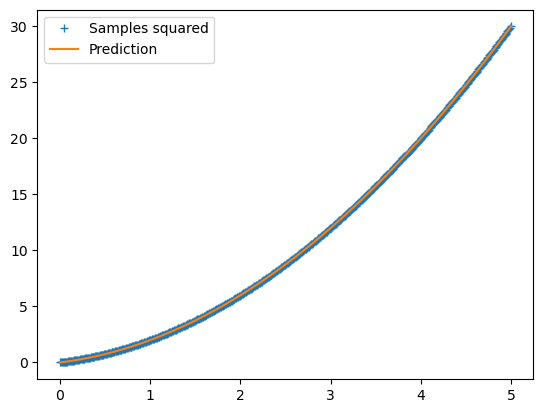

In [21]:
functions = []
function_names = []

n_data_points = 500 

x = np.linspace(0, 5, n_data_points).reshape(n_data_points,1)
y = ((x**2 + x)**(1/2)).flatten()


# The loss function needs to include 3 parameters:
# - y_pred: the prediction of the model
# - y: The "target" in general; This is the only parameter that is directly chosen as an input by the user, as part of the function .fit(x, y).
# - coefficients: the coefficients of ParFam. Usually this is interesting for regularization. Note, that it is only used during training and not testing,
#                 therefore, it is important to include the case that coefficients=None.
def custom_loss(y_pred, y, coefficients):
    if coefficients is None:
        reg = 0
    else: 
        reg = torch.norm(coefficients, p=1)
    return torch.norm(y_pred - y**2, p=2) / torch.norm(y, p=2) + 0.001 * reg

parfam = ParFamWrapper(config_name='small', iterate=False, degree_input_denominator=0, degree_output_denominator=0, function_names=function_names, functions=functions, 
                        degree_output_numerator=4, maximal_potence=4)
parfam.fit(x=x, y=y, custom_loss=custom_loss)

y_pred = parfam.predict(x)

plt.plot(x, y**2, '+', label='Samples squared')
plt.plot(x, y_pred, label='Prediction')
plt.legend()

In [22]:
parfam.get_formula(['x'])

1.0*x**2 + 1.0*x